Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.
- 2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

- 3*. Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
#Разделим выборку на обучающую и тестовую в соотношении 75/25.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
#Напишем функцию, реализующую предсказание в градиентном бустинге.
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
#В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
#Используем  L2  loss  L(y,z)=(y−z)2,  ее производная по  z  примет вид  L′(y,z)=2(z−y) .
#Реализуем ее также в виде функции (коэффициент 2 можно отбросить).
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5989.8744152956315
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4750.990510228706


In [12]:
import matplotlib.pyplot as plt

In [13]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

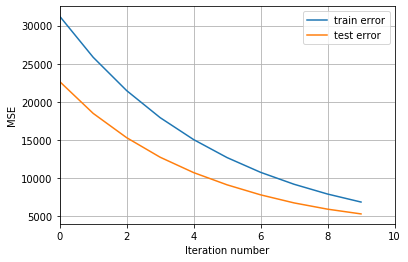

In [14]:
get_error_plot(n_trees, train_errors, test_errors)

In [15]:
# Зафиксируем максимальную глубину и шаг, сделаем перебор по деревьям (10, 50, 100)

In [16]:
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees_50, train_errors_50, test_errors_50 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [17]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_50, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1414.179511503867
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3109.264073383506


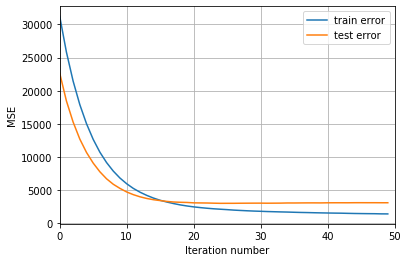

In [18]:
get_error_plot(n_trees, train_errors_50, test_errors_50)

In [19]:
# Число деревьев в ансамбле
n_trees = 100

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees_100, train_errors_100, test_errors_100 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [20]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_100, coefs, eta)

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 871.456858669314
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3099.762400781394


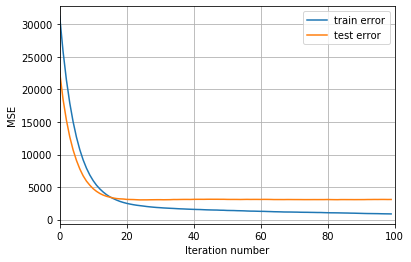

In [21]:
get_error_plot(n_trees, train_errors_100, test_errors_100)

In [35]:
# Зафиксируем n_trees=50 и попробуем увеличить глубину 5, 7, 10 узлов

In [36]:
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.1

trees_50_5, train_errors_50_5, test_errors_50_5 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [37]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_50_5, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 328.6665131936242
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3627.836227534152


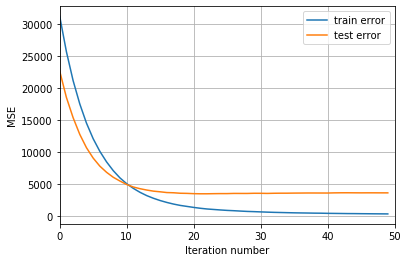

In [38]:
get_error_plot(n_trees, train_errors_50_5, test_errors_50_5)

In [31]:
# Для 7 узлов

In [32]:
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 7

# Шаг
eta = 0.1

trees_50_7, train_errors_50_7, test_errors_50_7 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [33]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_50_7, coefs, eta)

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 19.968394676776
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3911.0406599844946


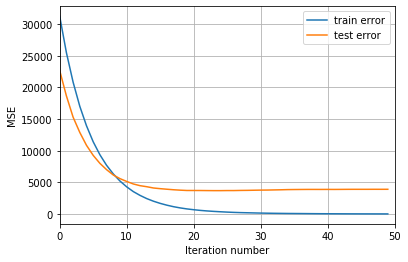

In [34]:
get_error_plot(n_trees, train_errors_50_7, test_errors_50_7)

Выводы: 
    - Для зависимости кол-во деревьев\ошибка на трейне (или тесте): возможно, это противоречит здравому смыслу, но ошибка на тесте увеличилась, а на трейне значительно уменьшилась. Скорее всего произошло переобучение  
    - Для зависимости глубины от ошибки на трейне(тесте): ошибка на трейне очень сильно падает при увеличении кол-ва деревьев. 
    
    
Считаю, что гиперпараметры модели нужно подбирать аккуратно и подходить к этому вопросу комплексно: шаг, глубина дерева и кол-во деревьев как-то связаны с ошибкой модели. 
  

Комментарий: 
    - дополнительные задания сделать не успел. Задачи идут в мой бэклог в Notion. Интересно было бы переписать этот алгоритм как в 4 дз в ООП. 